### Data Visualization Challange

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read csv data
df = pd.read_csv("./04.4movie_metadata.csv")      # df stands for data frame

In [5]:
df.head(10)     # to show top 10 items from the dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [7]:
df.columns   # to see all the column names

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

- We need to do some data cleaning as we only need movie_title column for length of title.

In [9]:
# to get all the data of a specified column
titles = df.get('movie_title') #pass column name from above columns as argument
type(titles)

pandas.core.series.Series

In [18]:
titles = list(df.get('movie_title'))
print(type(titles))
print(titles[:5]) #to see 1st 5 movie names
print(titles[0])

<class 'list'>
['Avatar\xa0', "Pirates of the Caribbean: At World's End\xa0", 'Spectre\xa0', 'The Dark Knight Rises\xa0', 'Star Wars: Episode VII - The Force Awakens\xa0            ']
Avatar 


In [24]:
dic = {}       # create a dictionary
for i in titles:
    length = len(i)
    if dic.get(length) is None:  # If length don't exist in dic, then initialize
                                 # frequency of this length = 1. else increment frequency.
        dic[length] = 1
    else:                          # else increment the frequency 
        dic[length] += 1

In [27]:
print(dic)

{7: 138, 41: 17, 8: 226, 22: 138, 55: 3, 12: 330, 13: 306, 24: 85, 39: 13, 35: 30, 17: 239, 18: 219, 43: 8, 16: 264, 44: 9, 15: 284, 42: 14, 23: 109, 11: 328, 36: 21, 19: 213, 10: 294, 27: 69, 20: 176, 32: 43, 26: 74, 25: 82, 14: 274, 21: 138, 31: 47, 51: 5, 6: 139, 5: 91, 63: 1, 3: 8, 9: 267, 38: 24, 28: 51, 29: 65, 34: 31, 57: 1, 47: 4, 4: 35, 37: 18, 48: 4, 46: 7, 40: 14, 45: 4, 49: 4, 50: 3, 30: 36, 33: 21, 2: 5, 59: 2, 60: 1, 56: 1, 84: 1, 54: 2, 87: 1, 53: 2, 72: 1, 69: 1, 80: 1, 67: 1}


In [33]:
plt.style.use('seaborn')

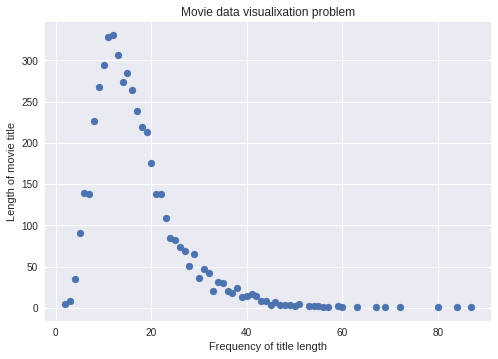

In [34]:
X = np.array(list(dic.keys()))
Y = np.array(list(dic.values()))
plt.scatter(X,Y)
plt.xlabel("Frequency of title length")
plt.ylabel("Length of movie title")
plt.title("Movie data visualixation problem")
plt.show()